# load leaderboard

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../leaderboards/leaderboard_nopunc.csv")
df = pd.read_csv("../leaderboards/leaderboard.csv")

# Ensure proper dtypes
df["WER (%)"] = pd.to_numeric(df["WER (%)"], errors="coerce")
df["CER (%)"] = pd.to_numeric(df["CER (%)"], errors="coerce")
df["Inference Time (s)"] = pd.to_numeric(df["Inference Time (s)"].astype(str).str.replace("s", ""), errors="coerce")
df["# Params (M)"] = pd.to_numeric(df["# Params (M)"], errors="coerce")

df["Model Name"] = df["Model Name"].str.replace(r"hsekhalilian/", "", regex=True)
df["Dataset Used"] = df["Dataset Used"].str.replace(r"hsekhalilian/", "", regex=True)

In [9]:
df = pd.read_csv("../leaderboards/leaderboard.csv")
df

,Model Name,WER (%),CER (%),Inference Time (s),Dataset Used,Sample Size,# Params (M),Hugging Face Link,Hardware Info,Last Updated,Notes
0,alifarokh/nemo-conformer-medium-fa,4.35,1.28,20s,hsekhalilian/sorted_commonvoice dev,1000,30.51,https://huggingface.co/alifarokh/nemo-conforme...,NVIDIA GeForce RTX 3060 (CUDA 12.8),2025-07-29,NaN
1,nvidia/stt_fa_fastconformer_hybrid_large,9.49,2.99,21s,hsekhalilian/sorted_commonvoice dev,1000,114.62,https://huggingface.co/nvidia/stt_fa_fastconfo...,NVIDIA GeForce RTX 3060 (CUDA 12.8),2025-07-29,NaN
2,hsekhalilian/Speech_To_Text_Finetuning_03_no_p...,9.98,2.99,20s,hsekhalilian/sorted_commonvoice dev,1000,114.62,https://huggingface.co/hsekhalilian/Speech_To_...,NVIDIA GeForce RTX 3060 (CUDA 12.8),2025-07-29,NaN
3,hsekhalilian/Speech_To_Text_Finetuning_03,13.13,4.24,20s,hsekhalilian/sorted_commonvoice dev,1000,114.62,https://huggingface.co/hsekhalilian/Speech_To_...,NVIDIA GeForce RTX 3060 (CUDA 12.8),2025-07-29,NaN
4,facebook/seamless-m4t-large,14.70,3.68,5m 31s,hsekhalilian/commonvoice dev,1000,1501.84,https://huggingface.co/facebook/seamless-m4t-l...,NVIDIA GeForce RTX 3060 (CUDA 12.8),2025-07-30,NaN
...,...,...,...,...,...,...,...,...,...,...,...
62,distil-whisper/distil-large-v3.5,108.45,100.33,1m 54s,hsekhalilian/fleurs validation,369,756.41,https://huggingface.co/distil-whisper/distil-l...,NVIDIA GeForce RTX 3060 (CUDA 12.8),2025-07-30,NaN
63,distil-whisper/distil-large-v3.5,114.85,107.01,3m 23s,hsekhalilian/commonvoice dev,1000,756.41,https://huggingface.co/distil-whisper/distil-l...,NVIDIA GeForce RTX 3060 (CUDA 12.8),2025-07-30,NaN
64,distil-whisper/distil-large-v3,117.23,112.49,3m 41s,hsekhalilian/commonvoice dev,1000,756.41,https://huggingface.co/distil-whisper/distil-l...,NVIDIA GeForce RTX 3060 (CUDA 12.8),2025-07-30,NaN
65,distil-whisper/distil-large-v3,123.26,114.34,2m 37s,hsekhalilian/fleurs validation,369,756.41,https://huggingface.co/distil-whisper/distil-l...,NVIDIA GeForce RTX 3060 (CUDA 12.8),2025-07-30,NaN


In [10]:
models=(
    "seamless:facebook/hf-seamless-m4t-medium",
    "seamless:facebook/seamless-m4t-large",
    "seamless:facebook/seamless-m4t-medium",
    "seamless:facebook/seamless-m4t-v2-large",
    "whisper:Neurai/NeuraSpeech_900h",
    "whisper:openai/whisper-small",
    "whisper:steja/whisper-large-persian",
    "whisper:distil-whisper/distil-large-v3",
    "whisper:distil-whisper/distil-large-v3.5",
)


In [11]:
for model in models:
    if model.split(":")[-1] not in list(df["Model Name"]):
        print(f"\"{model}\"")

"whisper:Neurai/NeuraSpeech_900h"


# WER and CER by Model

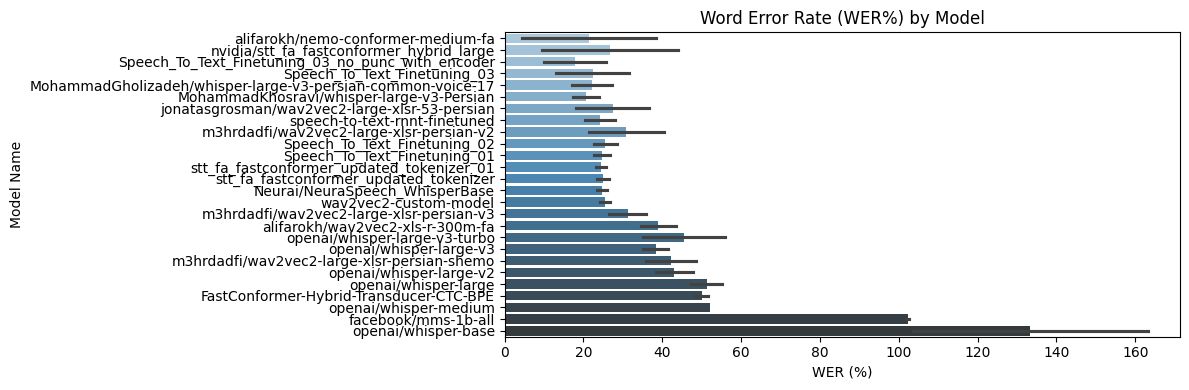

In [24]:
plt.figure(figsize=(12, 4))
sns.barplot(
    data=df.sort_values("WER (%)"),
    x="WER (%)",
    y="Model Name",
    hue="Model Name",
    dodge=False,
    palette="Blues_d",
    legend=False
)
plt.title("Word Error Rate (WER%) by Model")
plt.xlabel("WER (%)")
plt.ylabel("Model Name")
plt.tight_layout()
plt.show()

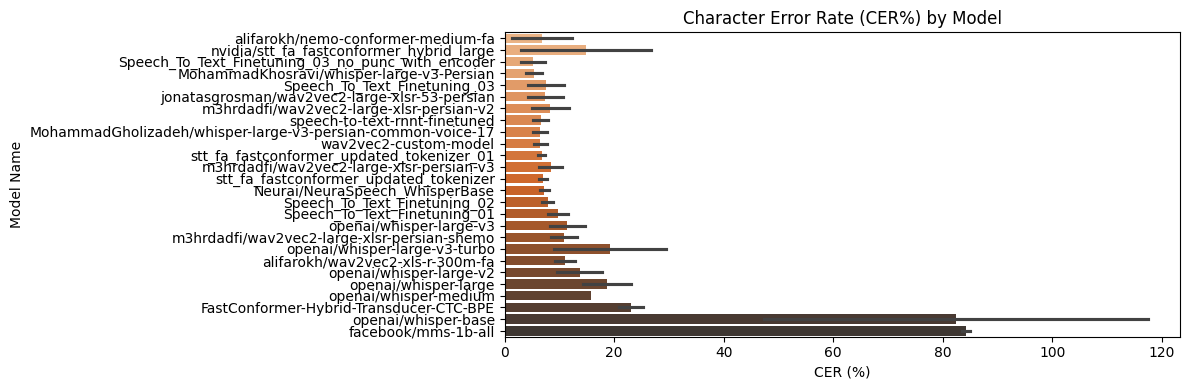

In [28]:
plt.figure(figsize=(12, 4))
sns.barplot(
    data=df.sort_values("CER (%)"),
    x="CER (%)",
    y="Model Name",
    hue="Model Name",
    dodge=False,
    palette="Oranges_d",
    legend=False
)
plt.title("Character Error Rate (CER%) by Model")
plt.xlabel("CER (%)")
plt.ylabel("Model Name")
plt.tight_layout()
plt.show()

# Inference Time vs WER Scatter Plot

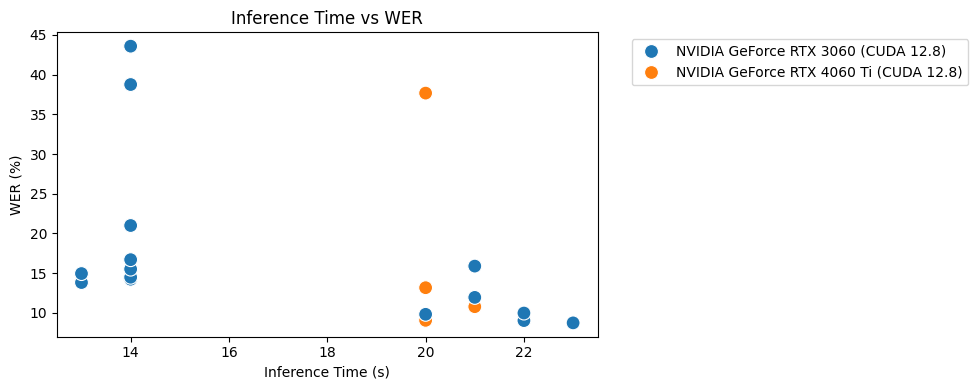

In [41]:
plt.figure(figsize=(10, 4))
sns.scatterplot(data=df, x="Inference Time (s)", y="WER (%)", hue="Hardware Info", s=100)
plt.title("Inference Time vs WER")
plt.xlabel("Inference Time (s)")
plt.ylabel("WER (%)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Model Performance on Different Datasets

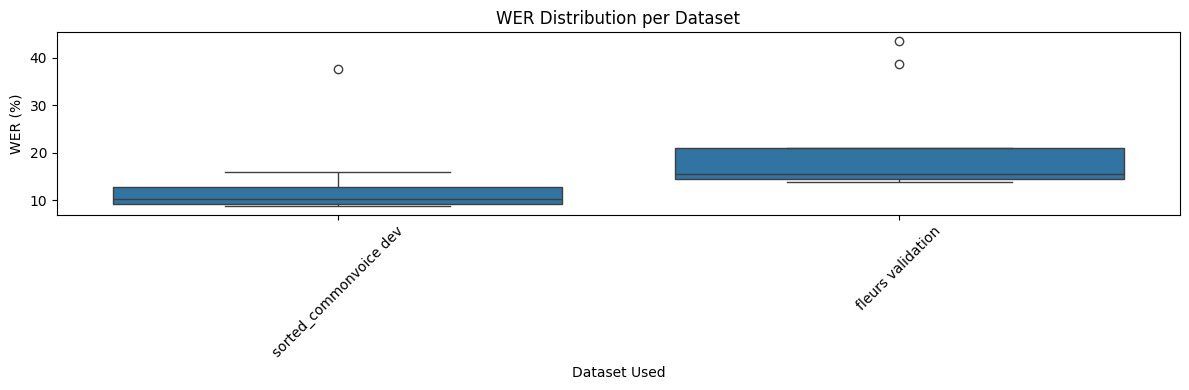

In [43]:
plt.figure(figsize=(12, 4))
sns.boxplot(data=df, x="Dataset Used", y="WER (%)")
plt.title("WER Distribution per Dataset")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Params vs Performance

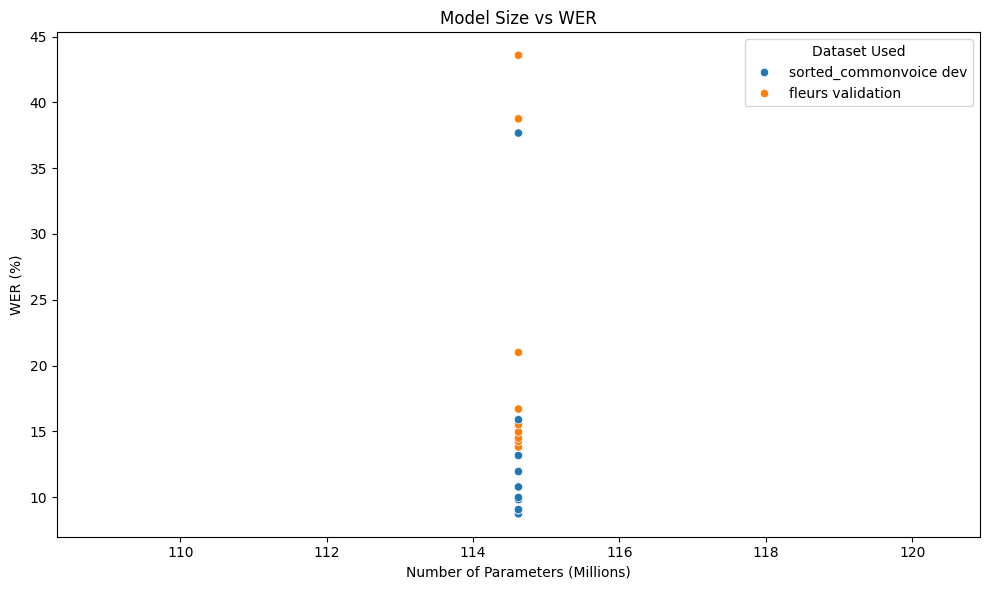

In [46]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="# Params (M)", y="WER (%)", hue="Dataset Used", sizes=(40, 200))
plt.title("Model Size vs WER")
plt.xlabel("Number of Parameters (Millions)")
plt.ylabel("WER (%)")
plt.tight_layout()
plt.show()